# 可视化激活函数

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

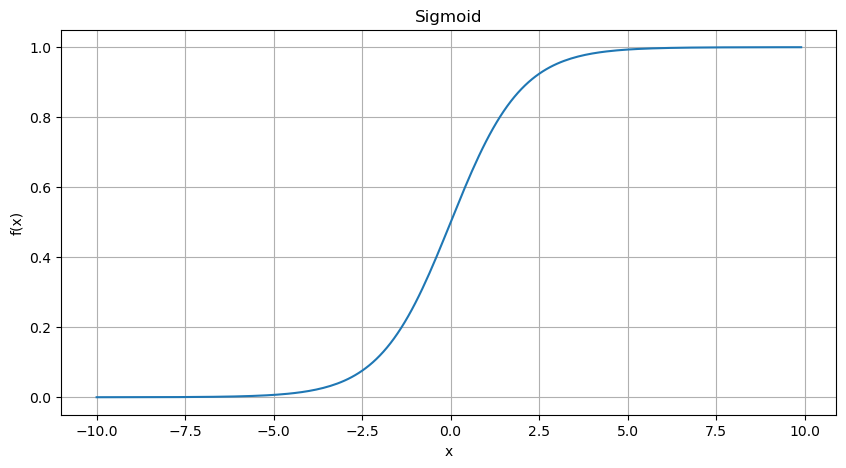

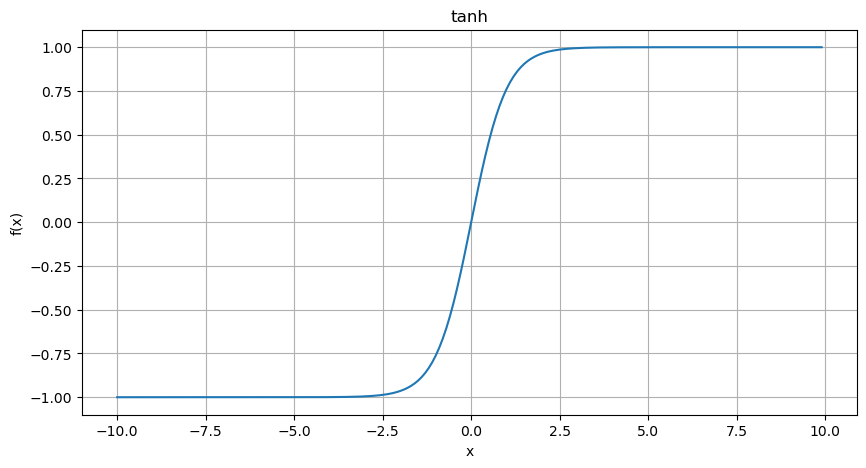

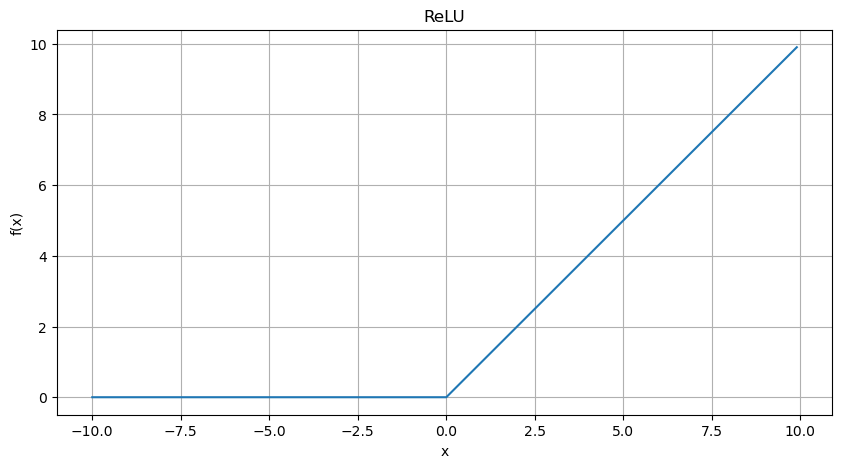

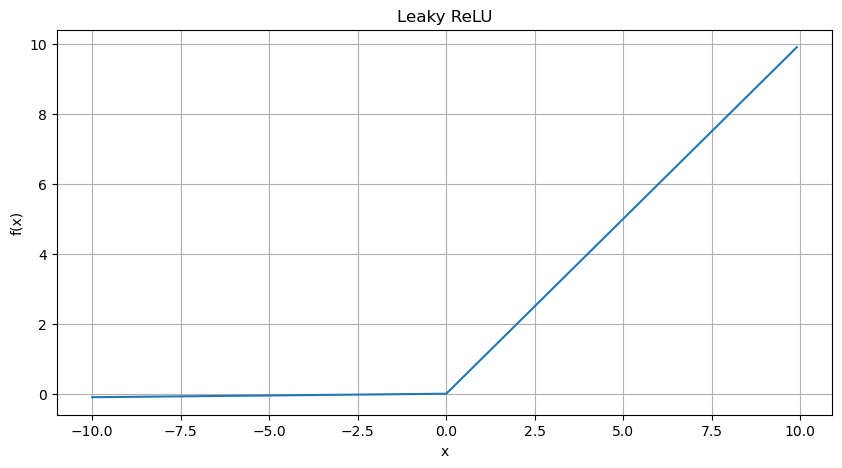

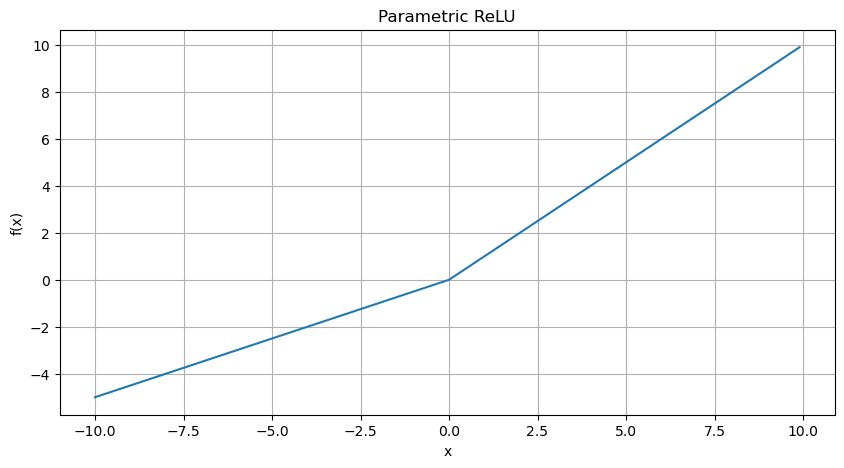

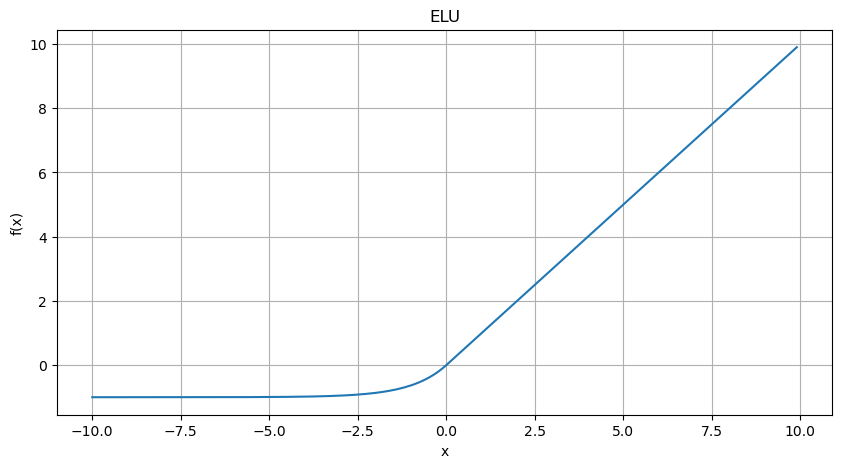

In [2]:
# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
  
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)
  
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def parametric_relu(x, parm=0.5):
    return np.where(x > 0, x, parm * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def plot_activation_function(func, x, title):
    y = func(x)
    #  创建并设置图形窗口大小
    # 窗口大小为10*5英寸，长宽
    plt.figure(figsize=(10, 5))
    # 绘制曲线
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()
    
x_value = np.arange(-10, 10, 0.1)
plot_activation_function(sigmoid, x_value, 'Sigmoid')
plot_activation_function(tanh, x_value, 'tanh')
plot_activation_function(relu, x_value, 'ReLU')
plot_activation_function(leaky_relu, x_value, 'Leaky ReLU')
plot_activation_function(parametric_relu, x_value, 'Parametric ReLU')
plot_activation_function(elu, x_value, 'ELU')


# 展示二维图像切线

In [51]:
def f(x):
  return x ** 2

# 导数（梯度）
def df(x):
  return 2 * x

# 绘制原始函数
x = np.linspace(-3, 3, 100)
y = f(x)

# 绘制切线
plt.figure(figsize=(8,6))
plt.plot(x, y, label='f(x) = x^2')
# plt.show()

# 在 x = 1 时的梯度和切线
x1 = 1
y1 = f(x1)
slop = df(x1)

# 切线方程
# y = m(x - x1) + y1
def tangent_line(x, x1, y1, slop):
  return slop * (x - x1) + y1

# 绘制切线
x_tangent = np.linspace(x1 - 1, x1 + 1, 10)
y_tangent = tangent_line(x_tangent, x1, y1, slop)

plt.plot(x_tangent, y_tangent, label='tangent at x = 1', color='red')
plt.scatter([x1], [y1], color='black')

# 设置图像
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Tangent Line at a point')
plt.grid(True)
plt.show()



<IPython.core.display.Javascript object>

# 展示三维函数切面

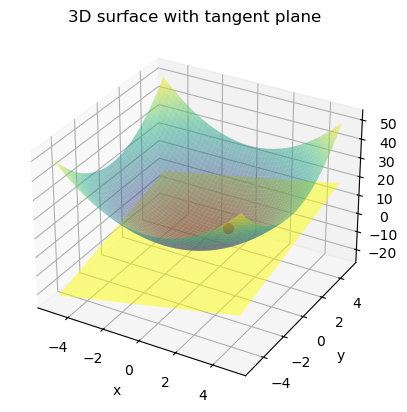

In [ ]:
# 创建x、y数据点
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
# 这里的X和Y是矩阵，X的每行重复x的值，Y的每列重复y的值
X, Y = np.meshgrid(x, y)

# 定义三维函数
def f(x, y):
  return x ** 2 + y ** 2

# 计算z值
z = f(x, y)

# 创建图形和轴
fig = plt.figure()
# 111表示第1行，第1列的第1个位置
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面
surf = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)

# 定义要突出显示的点
point_x, point_y = 1, 1
point_z = f(point_x, point_y)

# 绘制突出显示的点
ax.scatter(point_x, point_y, point_z, color='red', s=50)

# 计算切平面的法线
# 对于 f(x, y) = x² + y²，梯度为 (2x, 2y)，法向量为 (2x, 2y, -1)
normal = np.array([2 * point_x, 2 * point_y, -1])

# 定义平面上的点 x_plane, y_plane, z_plane
x_plane = np.linspace(-5, 5, 100)
y_plane = np.linspace(-5, 5, 100)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
# 计算切平面上每个点的z值
# 使用点法式平面方程：n₀(x-x₀) + n₁(y-y₀) + n₂(z-z₀) = 0
# 解出 z：z = (-n₀(x-x₀) - n₁(y-y₀)) / n₂ + z₀
z_plane = (-normal[0] * (X_plane - point_x) - normal[1] * (Y_plane - point_y)) / normal[2] + point_z

# 绘制切平面
ax.plot_surface(x_plane, y_plane, z_plane, color='yellow', alpha=0.5)

# 设置图像
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D surface with tangent plane')

plt.show()

# 神经网络的反向传播

In [3]:
# 定义输入值和期望输出
x_1 = 40
x_2 = 80
expected_output = 60

# 初始化

# 定义权重
w_1_11 = 0.5
w_1_12 = 0.5
w_1_13 = 0.5
w_1_21 = 0.5
w_1_22 = 0.5
w_1_23 = 0.5

w_2_11 = 1
w_2_21 = 1
w_2_31 = 1

# 前向传播
z_1 = w_1_11 * x_1 + w_1_21 * x_2 
z_2 = w_1_12 * x_1 + w_1_22 * x_2
z_3 = w_1_13 * x_1 + w_1_23 * x_2

y_pred = z_1 * w_2_11 + z_2 * w_2_21 + z_3 * w_2_31
print('前向传播预测值：', y_pred)

# 计算损失值（L2损失）
loss = 0.5 * (expected_output - y_pred) ** 2
print('损失值：', loss)

# 计算梯度

# 计算输出层关于损失函数的梯度
d_loss_predictied_output = -(expected_output - y_pred)

# 计算权重关于损失函数的梯度
d_loss_w_2_11 = d_loss_predictied_output * z_1
d_loss_w_2_21 = d_loss_predictied_output * z_2
d_loss_w_2_31 = d_loss_predictied_output * z_3

d_loss_w_1_11 = d_loss_predictied_output * w_2_11 * x_1
d_loss_w_1_21 = d_loss_predictied_output * w_2_11 * x_2
d_loss_w_1_12 = d_loss_predictied_output * w_2_21 * x_1
d_loss_w_1_22 = d_loss_predictied_output * w_2_21 * x_2
d_loss_w_1_13 = d_loss_predictied_output * w_2_31 * x_1
d_loss_w_1_23 = d_loss_predictied_output * w_2_31 * x_2

# 使用梯度下降法更新权重
learning_rate = 1e-5
w_2_11 -= learning_rate * d_loss_w_2_11
w_2_21 -= learning_rate * d_loss_w_2_21
w_2_31 -= learning_rate * d_loss_w_2_31

w_1_11 -= learning_rate * d_loss_w_1_11
w_1_12 -= learning_rate * d_loss_w_1_12
w_1_13 -= learning_rate * d_loss_w_1_13
w_1_21 -= learning_rate * d_loss_w_1_21
w_1_22 -= learning_rate * d_loss_w_1_22
w_1_23 -= learning_rate * d_loss_w_1_23

# 前向传播
z_1 = w_1_11 * x_1 + w_1_22 * x_2 
z_2 = w_1_12 * x_1 + w_1_22 * x_2
z_3 = w_1_13 * x_1 + w_1_23 * x_2

y_pred = z_1 * w_2_11 + z_2 * w_2_21 + z_3 * w_2_31
print('前向传播预测值2：', y_pred)

# 计算损失值（L2损失）
loss = 0.5 * (expected_output - y_pred) ** 2
print('损失值2：', loss)



前向传播预测值： 180.0
损失值： 7200.0
前向传播预测值2： 140.3136
损失值2： 3225.1371724800006


# 封装以上代码

In [4]:
def forward_propagation(layer_1_list, layer_2_list):
    w_1_11, w_1_12, w_1_13, w_1_21, w_1_22, w_1_23 = layer_1_list
    w_2_11, w_2_21, w_2_31 = layer_2_list
    z_1 = x_1 * w_1_11 + x_2 * w_1_21
    z_2 = x_1 * w_1_12 + x_2 * w_1_22
    z_3 = x_1 * w_1_13 + x_2 * w_1_23
    y_pred = z_1 * w_2_11 + z_2 * w_2_21 + z_3 * w_2_31
    return y_pred


def compute_loss(y_true, y_pred):
    loss = 0.5 * (y_true - y_pred) ** 2
    return loss

def backward_propagation(layer_1_list,layer_2_list,learning_rate):

    w_1_11, w_1_12, w_1_13, w_1_21, w_1_22, w_1_23 = layer_1_list
    w_2_11, w_2_21, w_2_31 = layer_2_list
    z_1 = x_1 * w_1_11 + x_2 * w_1_21
    z_2 = x_1 * w_1_12 + x_2 * w_1_22
    z_3 = x_1 * w_1_13 + x_2 * w_1_23

    # 计算输出层关于损失函数的梯度
    d_loss_predicted_output = -(expected_output - y_pred)

    # 计算权重关于损失函数的梯度
    d_loss_w_2_11 = d_loss_predicted_output * z_1
    d_loss_w_2_21 = d_loss_predicted_output * z_2
    d_loss_w_2_31 = d_loss_predicted_output * z_3

    d_loss_w_1_11 = d_loss_predicted_output * w_2_11 * x_1
    d_loss_w_1_21 = d_loss_predicted_output * w_2_11 * x_2
    d_loss_w_1_12 = d_loss_predicted_output * w_2_21 * x_1
    d_loss_w_1_22 = d_loss_predicted_output * w_2_21 * x_2
    d_loss_w_1_13 = d_loss_predicted_output * w_2_31 * x_1
    d_loss_w_1_23 = d_loss_predicted_output * w_2_31 * x_2

    # 使用梯度下降法更新权重
    w_2_11 -= learning_rate * d_loss_w_2_11
    w_2_21 -= learning_rate * d_loss_w_2_21
    w_2_31 -= learning_rate * d_loss_w_2_31

    w_1_11 -= learning_rate * d_loss_w_1_11
    w_1_12 -= learning_rate * d_loss_w_1_12
    w_1_13 -= learning_rate * d_loss_w_1_13
    w_1_21 -= learning_rate * d_loss_w_1_21
    w_1_22 -= learning_rate * d_loss_w_1_22
    w_1_23 -= learning_rate * d_loss_w_1_23

    layer_1_list = [w_1_11, w_1_12, w_1_13, w_1_21, w_1_22, w_1_23]
    layer_2_list = [w_2_11, w_2_21, w_2_31]
    return layer_1_list,layer_2_list


def parm_init():
    # 初始化定义权重
    w_1_11 = 0.5
    w_1_12 = 0.5
    w_1_13 = 0.5
    w_1_21 = 0.5
    w_1_22 = 0.5
    w_1_23 = 0.5

    w_2_11 = 1.0
    w_2_21 = 1.0
    w_2_31 = 1.0

    layer_1_list = [w_1_11,w_1_12,w_1_13,w_1_21,w_1_22,w_1_23]
    layer_2_list = [w_2_11,w_2_21,w_2_31]
    return layer_1_list, layer_2_list

if __name__ == '__main__':
    # 定义输入值和期望输出
    x_1 = 40.0
    x_2 = 80.0
    expected_output = 60.0
    learning_rate = 1e-5

    epoch = 100

    '''
    初始化
    '''
    # 初始化定义权重
    layer_1_list, layer_2_list = parm_init()

    for i in range(epoch):

        # 正向传播
        y_pred = forward_propagation(layer_1_list,layer_2_list)
        # 计算损失
        loss = compute_loss(expected_output, y_pred)
        print(f"第{i}次 预测值为： ", y_pred, " 误差为： ",loss)
        # 反向传播
        layer_1_list,layer_2_list = backward_propagation(layer_1_list,layer_2_list,learning_rate)


第0次 预测值为：  180.0  误差为：  7200.0
第1次 预测值为：  140.3136  误差为：  3225.1371724800006
第2次 预测值为：  118.31781819360718  误差为：  1700.4839594313103
第3次 预测值为：  104.16014082649772  误差为：  975.0590189080556
第4次 预测值为：  94.30345276813686  误差为：  588.3634359078984
第5次 预测值为：  87.1021308761172  误差为：  367.2627490130927
第6次 预测值为：  81.66875965907589  误差为：  234.7675725813973
第7次 预测值为：  77.47552406203667  误差为：  152.6969706214113
第8次 预测值为：  74.18561418573319  误差为：  100.6158249132373
第9次 预测值为：  71.57243827989716  误差为：  66.96066387101452
第10次 预测值为：  69.4771952292423  误差为：  44.90861470658649
第11次 预测值为：  67.78495240764865  误差为：  30.302741994677227
第12次 预测值为：  66.41036426295625  误差为：  20.546384991893312
第13次 预测值为：  65.28873380536271  误差为：  13.985352631993168
第14次 预测值为：  64.3701906440946  误差为：  9.549283132866014
第15次 预测值为：  63.61576744322396  误差为：  6.536887101739162
第16次 预测值为：  62.994676807405085  误差为：  4.484044590404957
第17次 预测值为：  62.48237244448162  误差为：  3.081086476560825
第18次 预测值为：  62.0591377280477  误差为：  2.120024091

# 3-4 制作梯度下降曲线图

第0次迭代，x1的值为：2.0
第1次迭代，x1的值为：1.6
第2次迭代，x1的值为：1.28
第3次迭代，x1的值为：1.024
第4次迭代，x1的值为：0.8192
第5次迭代，x1的值为：0.65536
第6次迭代，x1的值为：0.5242880000000001
第7次迭代，x1的值为：0.4194304000000001
第8次迭代，x1的值为：0.33554432000000006
第9次迭代，x1的值为：0.26843545600000007


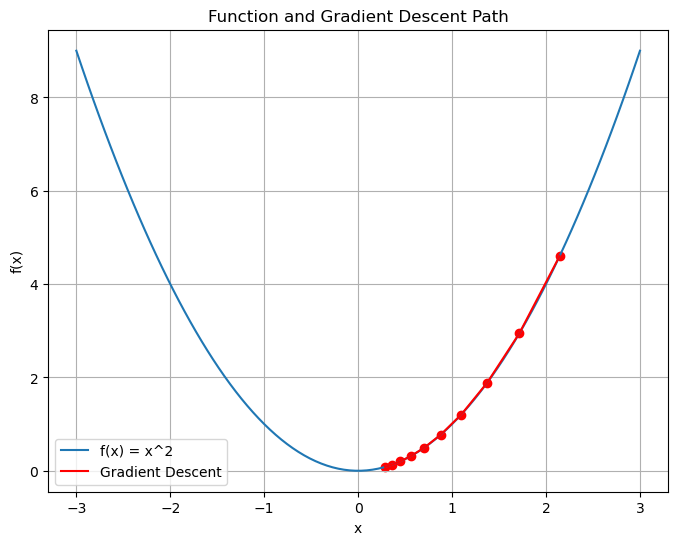

In [5]:
# 定义函数
def f(x):
  return x ** 2

# 定义导数
def df(x):
  return 2 * x
  
# 梯度下降参数
lr = 0.1
n_iterations = 10 # 迭代次数
x1 = 2.5 # 初始值

# 梯度下降算法
for i in range(n_iterations):
  gradient = df(x1)
  x1 = x1 - lr * gradient
  print(f'第{i}次迭代，x1的值为：{x1}')
  
# 绘制原始函数
x = np.linspace(-3, 3, 100)
y = f(x)

# 绘制梯度下降过程
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^2')

# 绘制梯度下降过程中 x 的位置
x_history = []
y_history = []

# 重新初始化x1 用于演示
x1 = np.random.uniform(-3, 3)

# 梯度下降算法
for i in range(n_iterations):
  gradient = df(x1)
  x1 = x1 - lr * gradient
  x_history.append(x1)
  y_history.append(f(x1))
  # 画出对应位置的散点图
  plt.scatter(x1, f(x1), color='red')

# 绘制梯度下降路径
plt.plot(x_history, y_history, label='Gradient Descent', color='red')

# 设置图形
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Gradient Descent Path')
plt.grid(True)
plt.show()



# 3-4 制作梯度下降求最小的动画

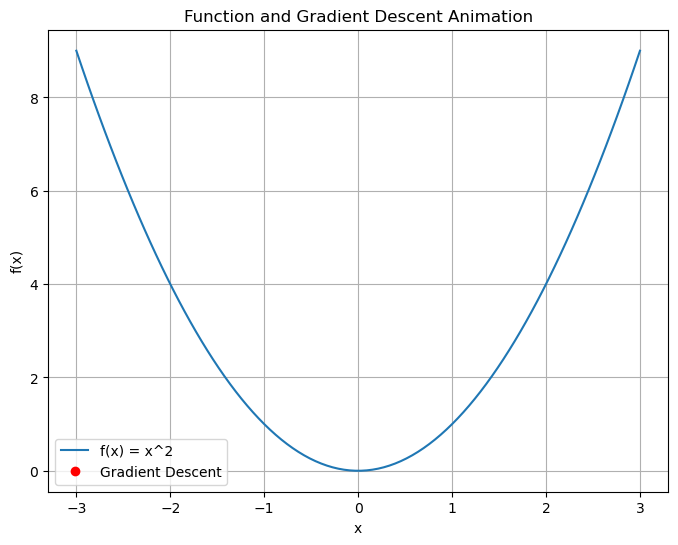

In [ ]:
# 定义函数
def f(x):
    return x**2


# 定义导数
def df(x):
    return 2 * x


# 梯度下降参数
lr = 0.1
n_iterations = 10  # 迭代次数
x1 = 2.5  # 初始值

# 绘制原始函数
x = np.linspace(-3, 3, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label="f(x) = x^2")
(point,) = ax.plot([], [], "ro", label="Gradient Descent")
value_display = ax.text(0.7, 0.02, "", transform=ax.transAxes)


def init():
    point.set_data([], [])
    value_display.set_text("")
    return point, value_display


def update(i):
    global x1
    gradient = df(x1)
    x1 -= lr * gradient
    point.set_data([x1], [f(x1)])
    value_display.set_text("Min = {:.2f}, {:.2f}".format(x1, f(x1)))
    return point, value_display


ani = FuncAnimation(
    fig, update, frames=np.arange(0, n_iterations), init_func=init, blit=True
)

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Function and Gradient Descent Animation")
ax.grid(True)
plt.show()

# 这里的动画在ipynb里运行不了，可以在 ./ani.py里运行

# 3-5 实现三维平面的梯度下降

Text(0.5, 0.5, 'y')

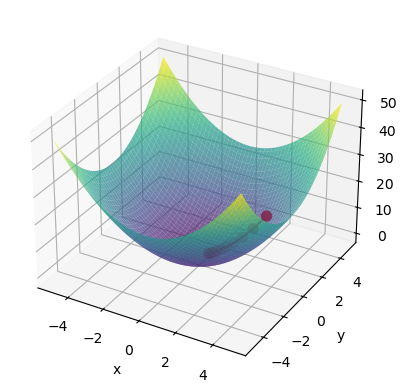

In [22]:
# 定义三维函数
def f(x, y):
  return x ** 2 + y ** 2

# 定义函数梯度
def grad_f(x, y):
  return 2 * x, 2 * y

# 梯度下降函数
def gradient_descent(grad, start_x, start_y, lr, n_iterations):
  x, y = start_x, start_y
  xs, ys, zs = [], [], []
  for i in range(n_iterations):
    dx, dy = grad(x, y)
    x, y = x - lr * dx, y - lr * dy
    z = f(x, y)
    xs.append(x)
    ys.append(y)
    zs.append(z)
  return xs, ys, zs

# 初始点
start_x, start_y = 3, 3

# 梯度下降
xs, ys, zs = gradient_descent(grad_f, start_x, start_y, lr, n_iterations)

# 创建图像和轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建x、y的数据点
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制三维曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# 绘制梯度下降路径
ax.scatter(xs, ys, zs, c='red', s=50)

# 绘制点的连线
for i in range(len(xs) - 1):
  ax.plot([xs[i], xs[i + 1]], [ys[i], ys[i + 1]], [zs[i], zs[i + 1]], c='red')

# 设置图形
ax.set_xlabel('x')
ax.set_ylabel('y')





